In [2]:
# Importing the required imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the CSV files into pandas dataframes

people = pd.read_csv('people.csv.zip')
act_train = pd.read_csv('act_train.csv.zip')
act_test = pd.read_csv('act_test.csv.zip')

In [4]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


Let's explore our DataFrames a little bit

In [5]:
people.columns

Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38'],
      dtype='object')

In [6]:
people_columns = ['char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37']

print('People DataFrame')
for c in people_columns:
    print(f'Number of unique values for {c:10}:{people[c].nunique()}')

People DataFrame
Number of unique values for char_1    :2
Number of unique values for group_1   :34224
Number of unique values for char_2    :3
Number of unique values for date      :1196
Number of unique values for char_3    :43
Number of unique values for char_4    :25
Number of unique values for char_5    :9
Number of unique values for char_6    :7
Number of unique values for char_7    :25
Number of unique values for char_8    :8
Number of unique values for char_9    :9
Number of unique values for char_10   :2
Number of unique values for char_11   :2
Number of unique values for char_12   :2
Number of unique values for char_13   :2
Number of unique values for char_14   :2
Number of unique values for char_15   :2
Number of unique values for char_16   :2
Number of unique values for char_17   :2
Number of unique values for char_18   :2
Number of unique values for char_19   :2
Number of unique values for char_20   :2
Number of unique values for char_21   :2
Number of unique values for ch

In [7]:
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [8]:
act_train.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [8]:
act_columns = ['date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome']

print('Action DataFrame')
for c in act_columns:
    print(f'Number of unique values for {c:20}:{act_train[c].nunique()}')

Action DataFrame
Number of unique values for date                :411
Number of unique values for activity_category   :7
Number of unique values for char_1              :51
Number of unique values for char_2              :32
Number of unique values for char_3              :11
Number of unique values for char_4              :7
Number of unique values for char_5              :7
Number of unique values for char_6              :5
Number of unique values for char_7              :8
Number of unique values for char_8              :18
Number of unique values for char_9              :19
Number of unique values for char_10             :6515
Number of unique values for outcome             :2


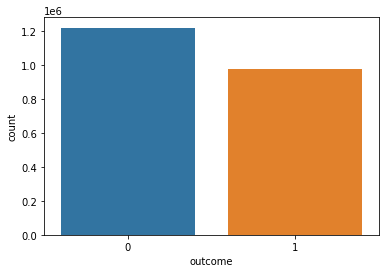

In [9]:
# Checking if the target variable is balanced.

sns.countplot(data=act_train, x='outcome')

The outcome is reasonably balanced!

In [10]:
# Saving the outcome column for later sateps

labels = act_train['outcome']

In [11]:
# Saving the acitivity_id for final submission

submission_ids = act_test['activity_id']

**Preprocessing the Data**

In [12]:
# Defining functions for preprocessing the Data

def preprocessing_actions(df, train_data=True):
    #removing the activity_id
    df.drop('activity_id', axis=1, inplace=True)
    
    #the outcome shall be stored prior to preprocessing to be used in model training step
    if (train_data):
        df.drop('outcome', axis=1, inplace=True)
    
    #simplifying the people_id column
    df['people_id'] = df['people_id'].apply(lambda x: x.split('_')[1])
    df['people_id'] = pd.to_numeric(df['people_id']).astype(int)
    
    #extracting the year from the date
    df['date'] = pd.to_datetime(df['date'])
    df['year_action'] = df['date'].apply(lambda x: x.year)
    df.drop('date', axis=1, inplace=True)
    
    columns = list(df.columns)
    columns = [c for c in columns if c not in ('year_action','people_id')]
    
    for c in columns:
        df[c] = df[c].fillna('type 0')
        df[c] = df[c].apply(lambda x: x.split(' ')[1])
        df[c] = pd.to_numeric(df[c]).astype(int)
    return df


def preprocessing_people(df):
    
    #simplifying the people_id column
    df['people_id'] = df['people_id'].apply(lambda x: x.split('_')[1])
    df['people_id'] = pd.to_numeric(df['people_id']).astype(int)
    
    #extracting the year from the date
    df['date'] = pd.to_datetime(df['date'])
    df['year_people'] = df['date'].apply(lambda x: x.year)
    df.drop('date', axis=1, inplace=True)
    
    columns = list(df.columns)
    strings = columns[1:11]
    bools = columns[11:39]
    
    for c in bools:
        df[c] = pd.to_numeric(df[c]).astype(int)
    
    for s in strings:
        df[s] = df[s].fillna('type 0')
        df[s] = df[s].apply(lambda x: x.split(' ')[1])
        df[s] = pd.to_numeric(df[s]).astype(int)
    return df

In [13]:
# Applying the above functions to the dataframes to clean and preprocess the data

people_processed = preprocessing_people(people)
act_train_processed = preprocessing_actions(act_train)
act_test_processed = preprocessing_actions(act_test, train_data=False)

In [14]:
# Merging the People and Actions DataFrames for model training

train = pd.merge(act_train_processed, people_processed, on='people_id')
test = pd.merge(act_test_processed, people_processed, on='people_id')

In [15]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
people_id,2197291.0,202386.318590,115972.828026,2.0,103276.0,204167.0,299791.0,398238.0
activity_category,2197291.0,2.997433,1.314068,1.0,2.0,3.0,4.0,7.0
char_1_x,2197291.0,0.497275,2.576469,0.0,0.0,0.0,0.0,52.0
char_2_x,2197291.0,0.372171,1.850443,0.0,0.0,0.0,0.0,32.0
char_3_x,2197291.0,0.282059,1.166786,0.0,0.0,0.0,0.0,11.0
char_4_x,2197291.0,0.200778,0.776089,0.0,0.0,0.0,0.0,7.0
char_5_x,2197291.0,0.256790,1.104695,0.0,0.0,0.0,0.0,7.0
char_6_x,2197291.0,0.144212,0.562884,0.0,0.0,0.0,0.0,5.0
char_7_x,2197291.0,0.183222,0.782631,0.0,0.0,0.0,0.0,8.0
char_8_x,2197291.0,0.378422,1.585741,0.0,0.0,0.0,0.0,18.0


There is no missing value and all columns are integers.

In [16]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

In [17]:
# instanciating the models for traianing

#svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
xgbc = XGBClassifier()

In [18]:
# training the models and calculating the prediction accuracy

models = [rfc, gbc, abc, xgbc]
for model in models:
    model.fit(X_train,y_train)
    predictions = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, predictions)
    print(f'The score of the {model} is: {score}\n')

The score of the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.997606310960262

The score of the GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                        

The best score is for RandomForestClassifier. So, I will base my final predictions based on it.

In [19]:
# Test DataFrame Predictions

predictions_test = rfc.predict_proba(test)[:,1]

In [20]:
# Creating the format for Kaggle submission

RandomForestClassifier_Output = pd.DataFrame({'activity_id': submission_ids, 'outcome':predictions_test})
RandomForestClassifier_Output.to_csv('RedHat_RandomForestClassifier_Output.csv', index=False)

In [21]:
RandomForestClassifier_Output.head()

,activity_id,outcome
0,act1_249281,0.4
1,act2_230855,0.7
2,act1_240724,0.5
3,act1_83552,0.5
4,act2_1043301,0.6
